###Install the package from Github

In [21]:
!pip install -t . git+https://github.com/atikul-islam-sajib/irisClass.git --upgrade

  Cloning https://github.com/atikul-islam-sajib/irisClass.git to /tmp/pip-req-build-m1mnx5ud
  Running command git clone --filter=blob:none --quiet https://github.com/atikul-islam-sajib/irisClass.git /tmp/pip-req-build-m1mnx5ud
  Resolved https://github.com/atikul-islam-sajib/irisClass.git to commit 7bf1a1ee59cf135686c3c428f92e4dbf4ee2ad64
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl (670.2 MB)
  Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Using cached filelock-3.12.4-py3-none-any.whl (11 kB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Using cached

In [24]:
!pip show classifier

####Import all necessary functions

In [25]:
import classifier
from classifier.dataset import dataloader
from classifier.ANN import ANN
from classifier.iris_training import iris_classifier
from classifier.evaluation import evaluation
from classifier.KFold import KFold_CV

In [26]:
# Call the dataloader
dataloader = dataloader(dataset = '/content/Iris.csv')
X, y, train_loader, test = dataloader.load_data()

Features of the dataset: ['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm', 'species'] 

X_train shape: torch.Size([120, 4])  

y_train shape: torch.Size([120])  

X_test shape : torch.Size([30, 4])  

y_test shape : torch.Size([30])  

__________________________________________________

Batch size of train loader # 16  

Batch size of test loader    # 16  

Train data with batch size   # torch.Size([16, 4])  

Test data with batch size    # torch.Size([16])  

__________________________________________________ 




In [27]:
# Call the model
model = ANN()

In [28]:
# Check total trainable parameters
model.total_trainable_parameters(model = model)


MODEL ARCHITECTURE

<generator object Module.parameters at 0x7885fb3069d0>

 __________________________________________________ 

Layer # LEFT_LAYER.0.weight & trainable parameters # 64 
Layer # LEFT_LAYER.0.bias & trainable parameters # 16 
Layer # LEFT_LAYER.3.weight & trainable parameters # 128 
Layer # LEFT_LAYER.3.bias & trainable parameters # 8 
Layer # RIGHT_LAYER.0.weight & trainable parameters # 128 
Layer # RIGHT_LAYER.0.bias & trainable parameters # 32 
Layer # RIGHT_LAYER.3.weight & trainable parameters # 512 
Layer # RIGHT_LAYER.3.bias & trainable parameters # 16 
Layer # OUT_LAYER.0.weight & trainable parameters # 384 
Layer # OUT_LAYER.0.bias & trainable parameters # 16 
Layer # OUT_LAYER.3.weight & trainable parameters # 48 
Layer # OUT_LAYER.3.bias & trainable parameters # 3 

 __________________________________________________ 

TOTAL TRAINABLE PARAMETERS # 1355  




In [29]:
# Start training
classifier = iris_classifier(model = model, train_loader = train_loader, test_loader = test, epochs = 500)

In [30]:
history = classifier.start_training()

Epoch 1/500 
16/16 [=========================] loss: 1.1115113496780396 - accuracy: 0.25 - val_loss: 1.0927257537841797 - val_accuracy: 0.42857142857142855 
Epoch 2/500 
16/16 [=========================] loss: 1.1183390617370605 - accuracy: 0.125 - val_loss: 1.0958683490753174 - val_accuracy: 0.35714285714285715 
Epoch 3/500 
16/16 [=========================] loss: 1.0898890495300293 - accuracy: 0.25 - val_loss: 1.0923283100128174 - val_accuracy: 0.2857142857142857 
Epoch 4/500 
16/16 [=========================] loss: 1.1063312292099 - accuracy: 0.125 - val_loss: 1.0838083028793335 - val_accuracy: 0.35714285714285715 
Epoch 5/500 
16/16 [=========================] loss: 1.0907866954803467 - accuracy: 0.25 - val_loss: 1.0742398500442505 - val_accuracy: 0.5 
Epoch 6/500 
16/16 [=========================] loss: 1.0491437911987305 - accuracy: 0.75 - val_loss: 1.0665210485458374 - val_accuracy: 0.6428571428571429 
Epoch 7/500 
16/16 [=========================] loss: 1.0423203706741333 - acc

In [31]:
# Check the loss and accuracy
import matplotlib.pyplot as plt

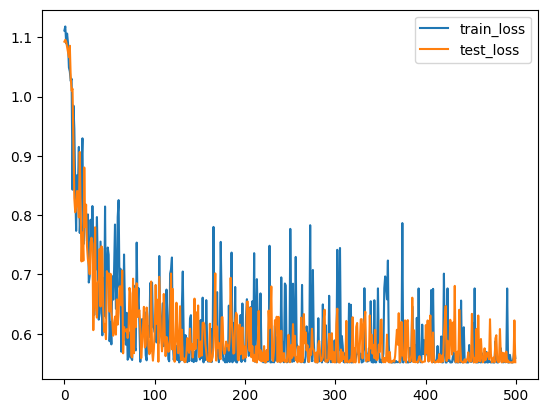

In [32]:
plt.plot(history['loss'], label = 'train_loss')
plt.plot(history['val_loss'], label = 'test_loss')
plt.legend()
plt.show()

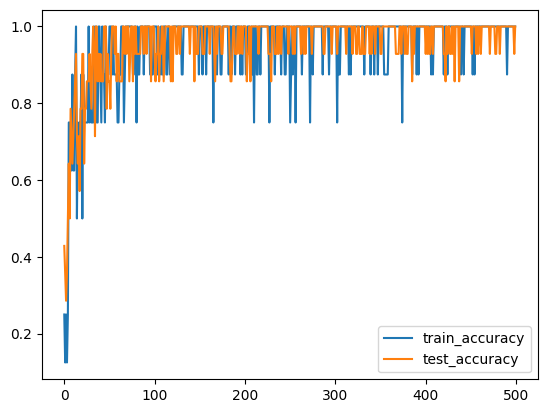

In [33]:
plt.plot(history['accuracy'], label = 'train_accuracy')
plt.plot(history['val_accuracy'], label = 'test_accuracy')
plt.legend()
plt.show()

In [34]:
# Check the performance
evaluation = evaluation(model = model, TRAIN_LOADER = train_loader, TEST_LOADER = test)

In [35]:
evaluation.train_evaluation()

**************************************************  TRAIN RESULTS: for 120 data  ************************************************** 


ACCURACY  # 0.9921875 
PRECISION # 0.9930555555555556 
RECALL    # 0.9916666666666667 
F1_SCORE  # 0.9915824915824916 


In [36]:
evaluation.validation_evaluation()


 **************************************************  TEST RESULTS for 30 data:  ************************************************** 

ACCURACY  # 1.0 
PRECISION # 1.0 
RECALL    # 1.0 
F1_SCORE  # 1.0 


In [37]:
# Use K-fold cross validation
KFold_CV(model = model, X = X, y = y, epochs = 100, fold = 5)

CV # 1  


CV # 2  


CV # 3  


CV # 4  


CV # 5  


__________________________________________________  With KFold - 5  __________________________________________________
ACCURACY # 0.9866666666666667  

PRECISON # 0.9866666666666667  

RECALL   # 0.9874643874643875  

F1_SCORE # 0.9863942208462333  



#### Intstall package

In [38]:
!pip install irisClass

In [39]:
import classifier
from classifier.dataset import dataloader
from classifier.ANN import ANN
from classifier.iris_training import iris_classifier
from classifier.evaluation import evaluation
from classifier.KFold import KFold_CV

In [40]:
# Call the dataloader
dataloader = dataloader(dataset = '/content/Iris.csv')
X, y, train_loader, test = dataloader.load_data()

Features of the dataset: ['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm', 'species'] 

X_train shape: torch.Size([120, 4])  

y_train shape: torch.Size([120])  

X_test shape : torch.Size([30, 4])  

y_test shape : torch.Size([30])  

__________________________________________________

Batch size of train loader # 16  

Batch size of test loader    # 16  

Train data with batch size   # torch.Size([16, 4])  

Test data with batch size    # torch.Size([16])  

__________________________________________________ 




In [41]:
# Call the model
model = ANN()

In [42]:
# Check total trainable parameters
model.total_trainable_parameters(model = model)


MODEL ARCHITECTURE

<generator object Module.parameters at 0x7885fac03bc0>

 __________________________________________________ 

Layer # LEFT_LAYER.0.weight & trainable parameters # 64 
Layer # LEFT_LAYER.0.bias & trainable parameters # 16 
Layer # LEFT_LAYER.3.weight & trainable parameters # 128 
Layer # LEFT_LAYER.3.bias & trainable parameters # 8 
Layer # RIGHT_LAYER.0.weight & trainable parameters # 128 
Layer # RIGHT_LAYER.0.bias & trainable parameters # 32 
Layer # RIGHT_LAYER.3.weight & trainable parameters # 512 
Layer # RIGHT_LAYER.3.bias & trainable parameters # 16 
Layer # OUT_LAYER.0.weight & trainable parameters # 384 
Layer # OUT_LAYER.0.bias & trainable parameters # 16 
Layer # OUT_LAYER.3.weight & trainable parameters # 48 
Layer # OUT_LAYER.3.bias & trainable parameters # 3 

 __________________________________________________ 

TOTAL TRAINABLE PARAMETERS # 1355  




In [43]:
# Start training
classifier = iris_classifier(model = model, train_loader = train_loader, test_loader = test, epochs = 100)

In [44]:
history = classifier.start_training()

Epoch 1/100 
16/16 [=========================] loss: 1.1027395725250244 - accuracy: 0.375 - val_loss: 1.094352126121521 - val_accuracy: 0.2857142857142857 
Epoch 2/100 
16/16 [=========================] loss: 1.0756431818008423 - accuracy: 0.25 - val_loss: 1.108298659324646 - val_accuracy: 0.21428571428571427 
Epoch 3/100 
16/16 [=========================] loss: 1.0991390943527222 - accuracy: 0.375 - val_loss: 1.0857983827590942 - val_accuracy: 0.5 
Epoch 4/100 
16/16 [=========================] loss: 1.077651023864746 - accuracy: 0.5 - val_loss: 1.0789234638214111 - val_accuracy: 0.5714285714285714 
Epoch 5/100 
16/16 [=========================] loss: 1.0508670806884766 - accuracy: 0.75 - val_loss: 1.0747569799423218 - val_accuracy: 0.6428571428571429 
Epoch 6/100 
16/16 [=========================] loss: 1.0653413534164429 - accuracy: 0.625 - val_loss: 1.0613762140274048 - val_accuracy: 0.7857142857142857 
Epoch 7/100 
16/16 [=========================] loss: 1.0430514812469482 - accur

In [45]:
# Check the loss and accuracy
import matplotlib.pyplot as plt

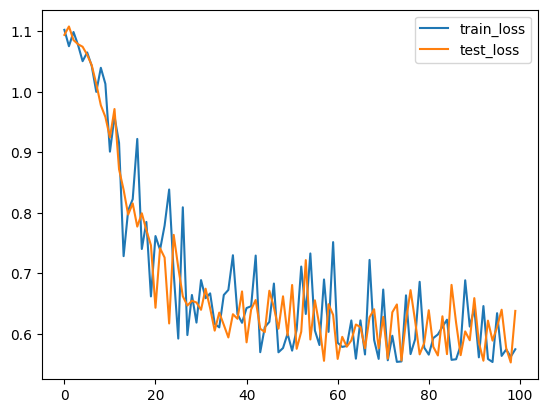

In [46]:
plt.plot(history['loss'], label = 'train_loss')
plt.plot(history['val_loss'], label = 'test_loss')
plt.legend()
plt.show()

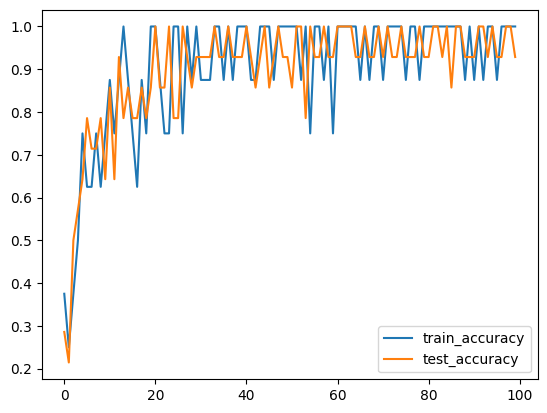

In [47]:
plt.plot(history['accuracy'], label = 'train_accuracy')
plt.plot(history['val_accuracy'], label = 'test_accuracy')
plt.legend()
plt.show()

In [48]:
# Check the performance
evaluation = evaluation(model = model, TRAIN_LOADER = train_loader, TEST_LOADER = test)

In [49]:
evaluation.train_evaluation()

**************************************************  TRAIN RESULTS: for 120 data  ************************************************** 


ACCURACY  # 0.9765625 
PRECISION # 0.9773809523809525 
RECALL    # 0.9821428571428572 
F1_SCORE  # 0.9762286324786325 


In [50]:
evaluation.validation_evaluation()


 **************************************************  TEST RESULTS for 30 data:  ************************************************** 

ACCURACY  # 0.9330357142857143 
PRECISION # 0.9333333333333332 
RECALL    # 0.9428571428571428 
F1_SCORE  # 0.9316239316239316 


In [51]:
# Use K-fold cross validation
KFold_CV(model = model, X = X, y = y, epochs = 100, fold = 5)

CV # 1  


CV # 2  


CV # 3  


CV # 4  


CV # 5  


__________________________________________________  With KFold - 5  __________________________________________________
ACCURACY # 0.9666666666666668  

PRECISON # 0.9638095238095239  

RECALL   # 0.9731986531986532  

F1_SCORE # 0.965094737850156  

